Decision Tree - Classification

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
data = pd.read_csv("/content/drive/MyDrive/4th SEM/ML/Datasets/ObesityDataSet.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#Checking missing values
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
for i in cols:
  data[i] = le.fit_transform(data[i])

In [ ]:
#Splitting target and features
x = data.iloc[:,:-1].values
y = data.iloc[:, [-1]].values

In [ ]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
#Training the model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4)

In [ ]:
#Representation of tree
from sklearn import tree
text_respresention = tree.export_text(clf)
print(text_respresention)

|--- feature_3 <= 99.57
|   |--- feature_3 <= 60.06
|   |   |--- feature_2 <= 1.66
|   |   |   |--- feature_3 <= 47.33
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  47.33
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  1.66
|   |   |   |--- feature_3 <= 60.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  60.00
|   |   |   |   |--- class: 1
|   |--- feature_3 >  60.06
|   |   |--- feature_3 <= 76.04
|   |   |   |--- feature_2 <= 1.74
|   |   |   |   |--- class: 5
|   |   |   |--- feature_2 >  1.74
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  76.04
|   |   |   |--- feature_2 <= 1.67
|   |   |   |   |--- class: 2
|   |   |   |--- feature_2 >  1.67
|   |   |   |   |--- class: 6
|--- feature_3 >  99.57
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 101.25
|   |   |   |--- class: 3
|   |   |--- feature_3 >  101.25
|   |   |   |--- class: 4
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 22.52
|   |   |   |--- feature_6 <= 2.57
|   |  

[Text(0.5288461538461539, 0.9, 'x[3] <= 99.568\ngini = 0.856\nsamples = 1688\nvalue = [218, 219, 275, 251, 256, 236, 233]'),
 Text(0.3076923076923077, 0.7, 'x[3] <= 60.059\ngini = 0.8\nsamples = 1091\nvalue = [218, 219, 186, 4, 0, 236, 228]'),
 Text(0.15384615384615385, 0.5, 'x[2] <= 1.66\ngini = 0.474\nsamples = 332\nvalue = [215, 108, 0, 0, 0, 8, 1]'),
 Text(0.07692307692307693, 0.3, 'x[3] <= 47.328\ngini = 0.542\nsamples = 173\nvalue = [72, 92, 0, 0, 0, 8, 1]'),
 Text(0.038461538461538464, 0.1, 'gini = 0.129\nsamples = 72\nvalue = [67, 5, 0, 0, 0, 0, 0]'),
 Text(0.11538461538461539, 0.1, 'gini = 0.249\nsamples = 101\nvalue = [5, 87, 0, 0, 0, 8, 1]'),
 Text(0.23076923076923078, 0.3, 'x[3] <= 59.995\ngini = 0.181\nsamples = 159\nvalue = [143, 16, 0, 0, 0, 0, 0]'),
 Text(0.19230769230769232, 0.1, 'gini = 0.104\nsamples = 146\nvalue = [138, 8, 0, 0, 0, 0, 0]'),
 Text(0.2692307692307692, 0.1, 'gini = 0.473\nsamples = 13\nvalue = [5, 8, 0, 0, 0, 0, 0]'),
 Text(0.46153846153846156, 0.5, 'x

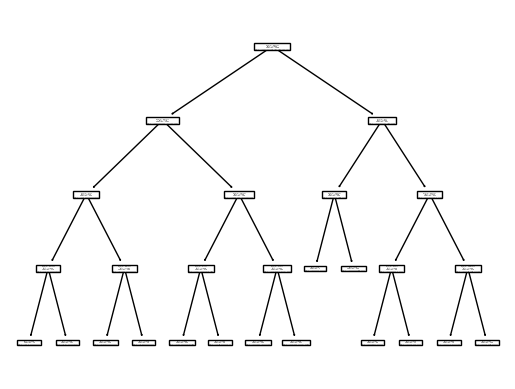

In [ ]:
#Plotting tree
tree.plot_tree(clf)

In [ ]:
y_pred=clf.predict(xtest)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        54
           1       0.80      0.59      0.68        68
           2       0.88      0.68      0.77        76
           3       0.86      0.93      0.90        46
           4       1.00      1.00      1.00        68
           5       0.56      0.63      0.59        54
           6       0.53      0.75      0.62        57

    accuracy                           0.77       423
   macro avg       0.79      0.78      0.78       423
weighted avg       0.80      0.77      0.78       423



In [ ]:
#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(ytest, y_pred))

Accuracy: 0.7730496453900709


Decision Tree - Regression

In [5]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Importing the dataset
data = pd.read_csv("/content/drive/MyDrive/4th SEM/ML/Datasets/Salary_Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
#Checking missing values
data.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [8]:
#Handling missing values
data = data.dropna()

In [9]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Education Level'] = le.fit_transform(data['Education Level'])
data['Job Title'] = le.fit_transform(data['Job Title'])

In [10]:
#Splitting target and features
x = data.iloc[:,:-1].values
y = data.iloc[:, [-1]].values

In [11]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [12]:
#Fitting the model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [14]:
#Representation of tree
from sklearn import tree
text_respresention = tree.export_text(clf)
print(text_respresention)

[Text(0.365562969787271, 0.975, 'x[4] <= 5.5\nsquared_error = 2754591639.232\nsamples = 5358\nvalue = 114837.29'),
 Text(0.11858540358686702, 0.925, 'x[2] <= 0.5\nsquared_error = 1062703859.243\nsamples = 2258\nvalue = 69333.948'),
 Text(0.039496706463565255, 0.875, 'x[3] <= 100.0\nsquared_error = 1694571514.533\nsamples = 378\nvalue = 110442.725'),
 Text(0.02156237134623302, 0.825, 'x[3] <= 18.5\nsquared_error = 1255168093.363\nsamples = 243\nvalue = 90812.14'),
 Text(0.008336764100452861, 0.775, 'x[4] <= 2.5\nsquared_error = 470708915.824\nsamples = 164\nvalue = 111567.073'),
 Text(0.0037052284890901604, 0.725, 'x[3] <= 17.5\nsquared_error = 199168286.832\nsamples = 89\nvalue = 97719.101'),
 Text(0.002881844380403458, 0.675, 'squared_error = 0.0\nsamples = 3\nvalue = 40000.0'),
 Text(0.004528612597776863, 0.675, 'x[0] <= 24.5\nsquared_error = 85847079.502\nsamples = 86\nvalue = 99732.558'),
 Text(0.002470152326060107, 0.625, 'x[4] <= 1.5\nsquared_error = 5017751.479\nsamples = 39\nva

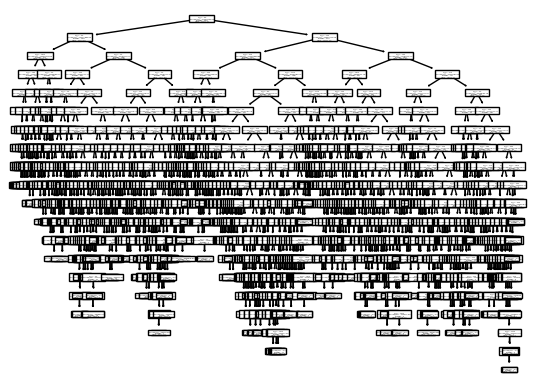

In [15]:
#Plotting tree
tree.plot_tree(model)

In [ ]:
y_pred= model.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(ytest,y_pred))

R2 Score: 0.9564076947471684
